## Using Exponential Moving Averages to detect outburst in ZTF
Below are some objects from the Outburst catalog, with a timespan of a possible outburst
and the magnitude limits for plotting. They are crossmatched from:
"Outburst catalogue of cataclysmic variables" (Coppejans+, 2016) in Vizier as J/MNRAS/456/4441/catalog

In [1]:
outbursts = [
    {'objectId':'ZTF18aazvajt', 'Tmin':58620, 'Tmax':58650, 'magmin':19, 'magmax':15},
    {'objectId':'ZTF18aabenub', 'Tmin':58700, 'Tmax':58720, 'magmin':18, 'magmax':12},
    {'objectId':'ZTF18abaxueg', 'Tmin':58580, 'Tmax':58680, 'magmin':19, 'magmax':15},
    {'objectId':'ZTF18aanhfnc', 'Tmin':58680, 'Tmax':58700, 'magmin':20, 'magmax':14},   
]

In [2]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import json
import wget

# Fetch data from Lasair
This function fetches the object data from Lasair as a JSON file, and makes lists of the apparent magnitude,
its three EMAs at 2 days, 8 days, and 28 days, for the two filters, g and r.

In [3]:
def from_database(objectId):
    file = '%s.json' % objectId
    try:
        o = json.loads(open(file).read())
    except:
        url = 'https://lasair.roe.ac.uk/object/%s/json/' % objectId
        wget.download(url, out=file)
        o = json.loads(open(file).read())
    print (o['objectId'])
    clist = o['candidates']

    tlist = {'g':[], 'r':[]}
    mags  = {'g':[], 'r':[]}
    f02   = {'g':[], 'r':[]}
    f08   = {'g':[], 'r':[]}
    f28   = {'g':[], 'r':[]}
        
    for c in clist:
        if 'candid' in c:
            if c['fid'] == 1: f = 'g'
            else:             f = 'r'
            tlist[f].append(c['mjd'])
            mags[f].append(c['dc_mag'])
            f02[f].append(c['dc_mag_%s02'%f])
            f08[f].append(c['dc_mag_%s08'%f])
            f28[f].append(c['dc_mag_%s28'%f])
            
    return {'objectId':objectId, 'tlist':tlist, 'mags':mags, 'f02':f02, 'f08':f08, 'f28':f28}

# Plot the outburst
Here we plot the apparent magnitude and the three EMAs for one of the two filters, with big red markers for 
candidates that re in outburst, according to the criterion E02 > E08 > E28 + 0.3.
The number 0.3 hers is about 3 times the error estimate in magnitudes from ZTF.

In [4]:
def plot_outburst(d, f, Tmin=0, Tmax=0, min=0, max=0):

    tlist = np.array(d['tlist'][f])
    mags  = np.array(d['mags'][f])
    f02   = np.array(d['f02'][f])
    f08   = np.array(d['f08'][f])
    f28   = np.array(d['f28'][f])
    plt.plot(tlist, mags, marker='o', color=(0.0, 0.0, 0.0))
    plt.plot(tlist, f02, color=(0.5, 0.5, 0.5))
    plt.plot(tlist, f08, color=(0.7, 0.7, 0.7))
    plt.plot(tlist, f28, color=(0.8, 0.8, 0.8))

    for i in range(len(d['tlist'][f])):
        p = -mags[i]
        q = -f02[i]
        r = -f08[i]
        s = -f28[i]
        if q > r and r > s + 0.3:
            t = tlist[i]
            m = mags[i]
            plt.plot([t], [m], marker='o', markersize=10, color="red")
        
    plt.xlabel('MJD')
    plt.ylabel('%s magnitude' % f)
    plt.title('%s, filter %s' % (d['objectId'], f))
    if min > 0:
        plt.axis(ymin=max, ymax=min)
    if Tmin > 0:
        plt.axis(xmin=Tmin, xmax=Tmax)
    plt.gca().invert_yaxis()


Now plot the four suspected  outbursts, with g filter left and r filter right.

ZTF18aazvajt


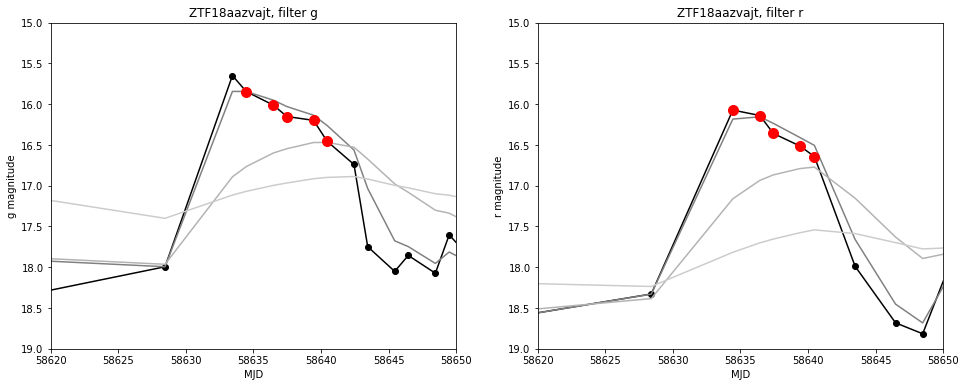

ZTF18aabenub


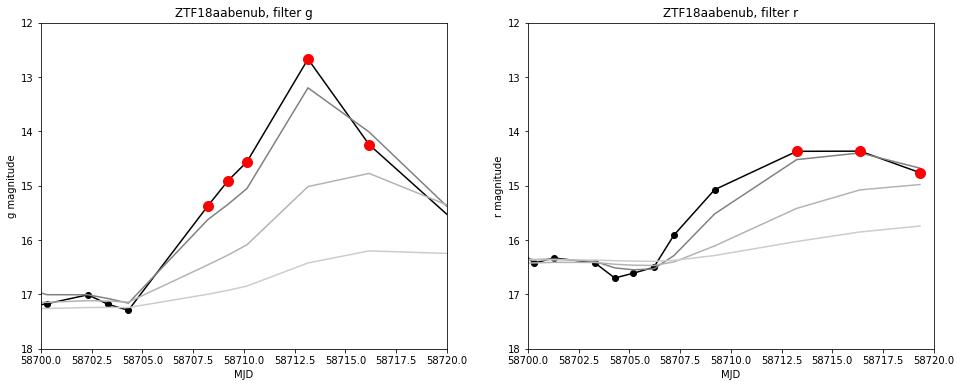

ZTF18abaxueg


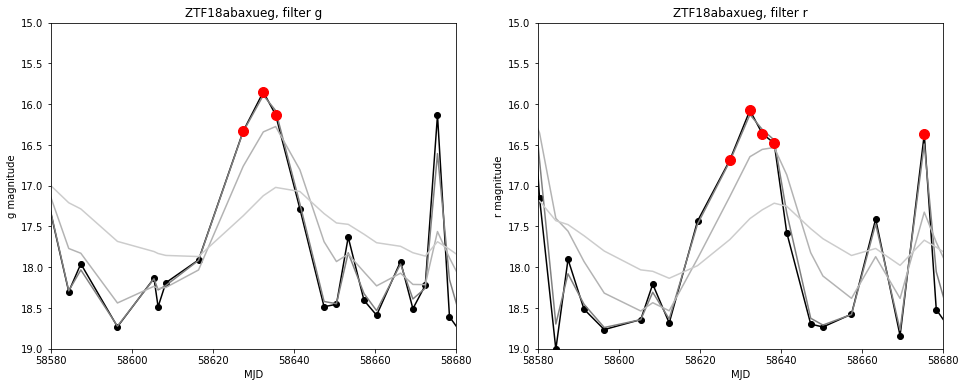

ZTF18aanhfnc


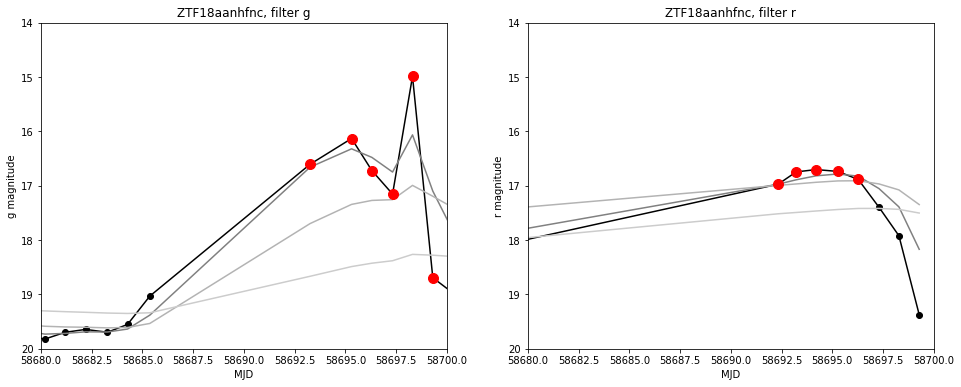

In [5]:
for ob in outbursts:
    d = from_database(ob['objectId'])
    plt.figure(figsize=(16,6))
    plt.subplot(1, 2, 1)
    plot_outburst(d, 'g', ob['Tmin'], ob['Tmax'], ob['magmin'], ob['magmax'])
    plt.subplot(1, 2, 2)
    plot_outburst(d, 'r', ob['Tmin'], ob['Tmax'], ob['magmin'], ob['magmax'])
    plt.show()